<div style="width: 100%; clear: both; font-family: Verdana;">
<div style="float: left; width: 50%;font-family: Verdana;">
<img src="https://github.com/Eligoze/att-rci-internal/blob/qa/RCI_DataAnalysis/eda/doc/att-logo1.png" align="left">
</div>
<div style="float: right; width: 200%;">
<p style="margin: 0; padding-top: 20px; text-align:right;color:rgb(193, 38, 184)"><strong>Axity - AT&T.
    Ciclo de vida de elementos de inventario</strong></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Exploratory Data Analysis

## ODK 12 (ATP Instalación MW)

## Descripción

Analizaremos los datos de la fuente **ODK 12** que corresponde a los elementos que se encuentran en instalación de AT&T con un tratamiento estadístico descriptivo para la exploración, explotación y descubrimiento de los datos para un correcto tracking del ciclo de vida de los elementos de red. 
Para esta fuente en particular tenemos 10 formularios diferentes:

- **ATPMW**: ATP Instalación MW
- **MWITX**: ATP Instalación MW (Nuevo enlace Tx) Obsolete
- **MWIN2**: ATP Instalación MW (Nuevo Enlace)
- **AMWIN**: ATP Instalación MW (Nuevo Enlace) Obsolete
- **RFE80**: ATP Instalación MW (Nuevo enlace, MWS)
- **WITX2**: ATP Instalación MW (Nuevo enlace, Tx) 
- **AOP2**: ATP Optimización MW
- **MTX2**: ATP Optimización MW (Tx)
- **MWOTX**: ATP Optimización MW (Tx)-Obsolete
- **AMWOP**: ATP Optimización MW-Obsolete

Nos centraremos en las claves de ATPMW, WITX2, MWITX y MWIN2 que son los tipos de formulario que se encuentran en el datalake.

Primero cargamos las librerías necesarias.

#### Conectando al Datalake

In [1]:
import os
os.environ['JAVA_HOME'] = '/usr/java/jdk1.8.0_162'
os.environ['SPARK_HOME'] = '/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/lib/spark'
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import HiveContext

In [2]:
conf = SparkConf().setAppName('ODK_12')  \
    .setMaster('yarn').set("spark.yarn.queue","root.eda")
spark = SparkSession.builder.config(conf=conf).getOrCreate()
sc = spark.sparkContext
sqlContext = HiveContext(sc)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
import pandasql 

import nltk
from nltk.probability import FreqDist
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#from pyspark.sql.functions import udf ,col
#from pyspark.sql.types import IntegerType,StringType

%matplotlib inline

from bokeh.io import show, output_notebook, output_file 
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20_11, Category20c_20, Category10_5,Category10_6, Category20_20, Plasma256
output_notebook()

/opt/cloudera/parcels/Anaconda-5.3.1/lib/python2.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Loading BokehJS ...

## 1. ODK 12
### 1. Recolección de los datos: 

Se crea el dataframe de spark con el universo de datos crudos.

In [4]:
df = spark.sql("SELECT * FROM tx_stg_06_tabular_odk_12").cache().toPandas()

In [5]:
df

,id_form,clave_form,element_group,element,exist,TipoElemento_key,TipoElemento_value
0,102341,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1519779261882.jpg (image/jpeg)
1,103636,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1521213704361.jpg (image/jpeg)
2,104237,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1522270194317.jpg (image/jpeg)
3,110042,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1529637323382.jpg (image/jpeg)
4,111650,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1532990550837.jpg (image/jpeg)
5,16089,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1450378225292.jpg (image/jpeg)
6,22410,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1458087131765.jpg (image/jpeg)
7,33027,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1465578436201.jpg (image/jpeg)
8,35255,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1468292677107.jpg (image/jpeg)
9,38728,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1470936860504.jpg (image/jpeg)


Para las fuentes de los ODK's nos interesa conocer todos los elementos en sitio, por lo que haremos una limpieza en los campos que contengan características de los mismos.
Creamos una función para el tratamiento del campo de sitio en spark el cual contiene ciertas reglas definidas para su limpieza.

### Una muestra del ODK 12:

In [6]:
df.head(10)

,id_form,clave_form,element_group,element,exist,TipoElemento_key,TipoElemento_value
0,102341,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1519779261882.jpg (image/jpeg)
1,103636,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1521213704361.jpg (image/jpeg)
2,104237,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1522270194317.jpg (image/jpeg)
3,110042,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1529637323382.jpg (image/jpeg)
4,111650,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1532990550837.jpg (image/jpeg)
5,16089,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1450378225292.jpg (image/jpeg)
6,22410,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1458087131765.jpg (image/jpeg)
7,33027,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1465578436201.jpg (image/jpeg)
8,35255,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1468292677107.jpg (image/jpeg)
9,38728,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1470936860504.jpg (image/jpeg)


### 2. Descripción de las fuentes.

En este apartado se describe a detalle el tipo información de la fuente para una mejor comprensión de los datos. Se mostrarán los tipos de datos, tamaño de la fuente, es decir, su dimensionalidad y una estadística descriptiva, en ese orden.

In [7]:
print 'renglones = ',df.shape[0],' columnas = ',df.shape[1]

renglones =  75588  columnas =  7


#### Una breve descripción de los campos:
* **id_form**: Número de formulario en *Panda*.
* **clave_form**: Clave de identificación del ODK.
* **element_group**: Element group.
* **element**: Hijo del element group.
* **exist**: Campo diseñado durante la extracción de los datos para identificar que el campo buscado se encuentra existente.
* **TipoElemento_key**: Nombre del campo.
* **TipoElemento_value**: Atributo del campo.

Con la transformación que se llevo a cabo previamente, los campos **id_form, clave_form, element_group, element, exist** sirven para tener un control y mejor manejo del odk. Los campos **TipoElemento_key y TipoElemento_value** son los que se utilizarán para sacar indicadores.
A continuación se muestran los datos únicos en el campo **TipoElemento_Key**

Se muestra la información de campos únicos que se encuentran en **TipoElemento_Key** de nuestra tabla que vamos a considerar para los cálculos.

In [8]:
df.TipoElemento_key.unique().tolist()

[u'Barra de Tierra',
 u'Barra de Tierra en Torre',
 u'Segunda Barra de Tierra en Torre',
 u'N\xfamero de serie (manual)',
 None,
 u'Modelo de la antena de MW',
 u'Modelo de ODU',
 u'Modelo',
 u'Modelo de IDU',
 u'N\xfamero de activo fijo (manual)',
 u'Fabricante / Modelo de antena de MW',
 u'N\xfamero de serie (esc\xe1ner)',
 u'Fabricante',
 u'N\xfamero de activo fijo (esc\xe1ner)',
 u'Atizador',
 u'PTR',
 u'Fabricante / Modelo IDU']

Podemos observar que algunos de los campos contienen caractéres especiales que posteriormente se hará una limpieza.
A continuación se muestran un conteo de los campos que se obtuvieron de la transformación en el notebook Adquisición_Datos_ODK_12.

In [9]:
pandasql.sqldf("SELECT tipoelemento_key, count(*) as conteo FROM df group by tipoelemento_key;", locals())

,TipoElemento_key,conteo
0,None,597
1,Atizador,937
2,Barra de Tierra,6983
3,Barra de Tierra en Torre,6982
4,Fabricante,6337
5,Fabricante / Modelo IDU,1254
6,Fabricante / Modelo de antena de MW,2356
7,Modelo,9375
8,Modelo de IDU,6986
9,Modelo de ODU,7918


Para el cálculo de indicadores que se va a realizar mas adelante, nos vamos a enfocar en el campo Número de Serie (manual) y Serie (escáner) los cuales son campos identificados que contienen números de serie.

In [10]:
dfSerie = pandasql.sqldf("SELECT tipoelemento_value FROM df WHERE tipoelemento_key IN ('Número de serie (manual)', 'Número de serie (escáner)');", locals())
dfSerie.describe(include='all')

,TipoElemento_value
count,7580
unique,5806
top,N/A
freq,180


Podemos observar que en la tabla tenemos el total del número de serie con el **count**, los campos únicos con **unique** y el valor que más se repite con el **top** y cuántas veces se retipe con el **freq**.

Debemos de tener en cuenta que el número de renglones no representa el número de elementos sino que es la información al nivel más bajo de cada formulario. Es decir, debemos considerar que para cada id_form hay diferente número de registros.

### Tamaño de la fuente

In [11]:
print('rows = ',df.shape[0],' columnas = ',df.shape[1])

('rows = ', 75588, ' columnas = ', 7)


### 3. Exploración de los datos.

De acuerdo al análisis anterior, procederemos a observar algunos detalles de la fuente:

In [12]:
print 'Los atributos priority que encontramos en este ODK en los distintos element groups son:'
Freq_Atributos=pd.DataFrame(df.TipoElemento_key.value_counts())
Freq_Atributos

Los atributos priority que encontramos en este ODK en los distintos element groups son:


,TipoElemento_key
Modelo,9375
Modelo de ODU,7918
Modelo de la antena de MW,7918
Modelo de IDU,6986
Barra de Tierra,6983
Barra de Tierra en Torre,6982
Fabricante,6337
Número de serie (manual),5734
Número de activo fijo (manual),5368
Fabricante / Modelo de antena de MW,2356


Text(0.5,0,'Atributos')

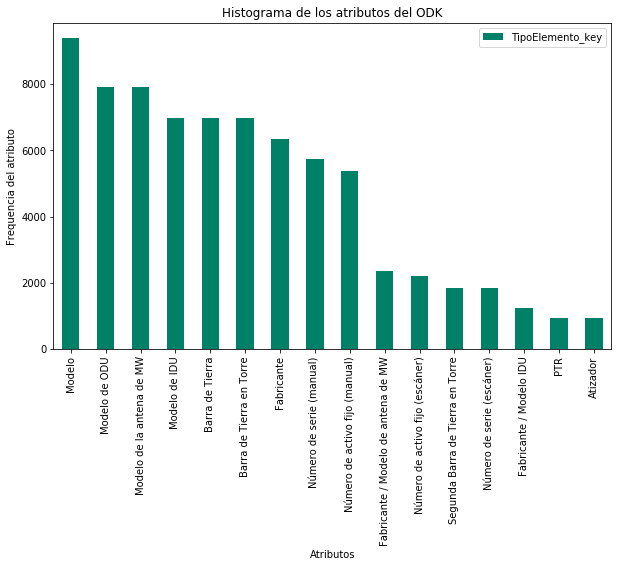

In [13]:
Freq_Atributos.plot(kind='bar',figsize=(10,6),rot=90,colormap='summer')

plt.title('Histograma de los atributos del ODK')
plt.ylabel('Frequencia del atributo')
plt.xlabel('Atributos')

#### Se hará una limpieza para homologar los campos de serie y activo:


In [14]:
stoppers=[u'numero de',u'número de',u'escaner',u'manual',u' fijo',u'escáner',u'scanner']
df['TipoElemento_Key_Clean']=df.TipoElemento_key

df.TipoElemento_Key_Clean=df.TipoElemento_Key_Clean.str.lower()
df.TipoElemento_Key_Clean=df.TipoElemento_Key_Clean.str.replace("\)",'')
df.TipoElemento_Key_Clean=df.TipoElemento_Key_Clean.str.replace("\(",'')
df.TipoElemento_Key_Clean.replace(u'á',u'a',regex=True,inplace=True)
df.TipoElemento_Key_Clean.replace(u'é',u'e',regex=True,inplace=True)
df.TipoElemento_Key_Clean.replace(u'í',u'i',regex=True,inplace=True)
df.TipoElemento_Key_Clean.replace(u'ó',u'o',regex=True,inplace=True)
df.TipoElemento_Key_Clean.replace(u'ú',u'u',regex=True,inplace=True)
df.TipoElemento_Key_Clean.replace(u'ú',u'u',regex=True,inplace=True)
df.TipoElemento_Key_Clean.replace(stoppers,u'',regex=True,inplace=True)
df.TipoElemento_Key_Clean=df.TipoElemento_Key_Clean.str.strip()

#### Después de haber pasado una limpieza, podemos tener homologados los campos:

In [15]:
#Se debe observar que serie y activo han quedado homologados
pd.DataFrame(df.TipoElemento_Key_Clean.value_counts())

,TipoElemento_Key_Clean
modelo,9375
modelo de odu,7918
modelo de la antena de mw,7918
serie,7580
activo,7580
modelo de idu,6986
barra de tierra,6983
barra de tierra en torre,6982
fabricante,6337
fabricante / modelo de antena de mw,2356


Hacemos una descripción del campo homologado con serie.

In [16]:
#pd.DataFrame(df.TipoElemento_Key_Clean.loc[df.TipoElemento_Key_Clean=='serie'].describe())
pd.DataFrame(df.TipoElemento_value.loc[df.TipoElemento_Key_Clean=='serie'].describe())

,TipoElemento_value
count,7580
unique,5806
top,N/A
freq,180


Hacemos una descripción del campo homologado con activo.

In [17]:
#pd.DataFrame(df.TipoElemento_Key_Clean.loc[df.TipoElemento_Key_Clean=='activo'].describe())
pd.DataFrame(df.TipoElemento_value.loc[df.TipoElemento_Key_Clean=='activo'].describe())

,TipoElemento_value
count,7580
unique,4706
top,N/A
freq,392


#### Campo Fabricante

In [18]:
Cat_Fabricante=pd.DataFrame(df.TipoElemento_value.loc[df.TipoElemento_Key_Clean=='fabricante']).drop_duplicates().reset_index(drop=True)
Cat_Fabricante.head()

,TipoElemento_value
0,CERAGON
1,OTH
2,N/A
3,RadioFrecunciaSistems
4,Ceragon


In [19]:
dirt=['no visible','n/v','nv','ilegible',u'n/a','na','no legible','N/A',
      'n/v deteriorado','sin activo fijo','no vicible','no hay','no tiene','No visble','no visble',u'versió',
      'No viaible','noisible','no aplica','n /v','finizar','no bisible','finisar','finsar',u'ftlfpbnl',u'ñ/a',u'ñ']

#En caso de que se requieran eliminar los números se utilizará la siguiente lista:
nums=['1','2','3','4','5','6','7','8','9','0']

Cat_Fabricante.TipoElemento_value=Cat_Fabricante.TipoElemento_value.str.lower()
Cat_Fabricante.TipoElemento_value=Cat_Fabricante.TipoElemento_value.str.replace('.','')
Cat_Fabricante.TipoElemento_value.fillna(np.NaN,inplace=True)
Cat_Fabricante.replace(u'inc.','',regex=True,inplace=True)
Cat_Fabricante.TipoElemento_value.replace(dirt,'',regex=True,inplace=True)
Cat_Fabricante.head(20)

,TipoElemento_value
0,ceragon
1,oth
2,
3,radiofrecunciasistems
4,ceragon
5,nec
6,nec
7,ceragon
8,hwi
9,nec


In [20]:
#Similitud de palabras se usarán las librerías fuzzywuzzy y nltk:
fdist=FreqDist(Cat_Fabricante.TipoElemento_value)
fdist.most_common(100)

[(u' ', 9),
 (u'  ', 9),
 (u'  seniortek', 5),
 (u' nec pasolink', 5),
 (u' nec ipasolink', 5),
 (u'  nec pasolink', 4),
 (u' ceragon', 4),
 (u' ipasolink', 3),
 (u'  universal microwave technology', 3),
 (u' commscope', 3),
 (u' nec paso link', 3),
 (u'  senior tek', 3),
 (u' radio frequency systems', 3),
 (u'  ceragon', 3),
 (u' ceragon ip20c', 3),
 (u' nec', 3),
 (u'  universal microwave tecnology', 2),
 (u'  nec', 2),
 (u' rfs', 2),
 (u'  commscope', 2),
 (u' atel', 2),
 (u' chatsworth', 2),
 (u'  rfs', 2),
 (u'  no lleva acoplador', 2),
 (u' comscope', 2),
 (u'  andrew', 2),
 (u' radio frecuency systems', 2),
 (u' ericsson', 2),
 (u'  (omt) universal microwave technologyseniortek', 2),
 (u' rack', 2),
 (u' ipasolink nec', 2),
 (u' seragon', 2),
 (u' huawei', 2),
 (u'  ipasolink', 2),
 (u' ip20c', 2),
 (u'  nec ipasolink', 2),
 (u' andrew', 2),
 (u'  hwi', 1),
 (u' nec pasolinik', 1),
 (u' apm30h', 1),
 (u' rfc', 1),
 (u' x', 1),
 (u' ip-20c-hp', 1),
 (u' nec ipaso link', 1),
 (u' 

In [21]:
len(fdist)

150

In [22]:
Clean_Fabricante=[v for v,k in fdist.items() if k>2]

#En caso de querer agregar elementos:
#Clean_CAMPO.append(u'ELEMENTO')

#En caso de querer eliminar elementos:
#Clean_CAMPO.remove(u'ELEMENTO')

Clean_Fabricante

[u'  nec pasolink',
 u' ',
 u' ipasolink',
 u'  ',
 u'  seniortek',
 u'  universal microwave technology',
 u' commscope',
 u' nec pasolink',
 u' nec paso link',
 u' ceragon',
 u'  senior tek',
 u' nec ipasolink',
 u' radio frequency systems',
 u'  ceragon',
 u' ceragon ip20c',
 u' nec']

In [23]:
Cat_Fabricante['Clean']=1
for v in range(0,Cat_Fabricante.shape[0]):
    Cat_Fabricante.Clean[v]=process.extractOne(Cat_Fabricante.TipoElemento_value[v],
                                            Clean_Fabricante,
                                            scorer=fuzz.partial_ratio,
                                            score_cutoff=67)
    if Cat_Fabricante.Clean[v] is None:
        Cat_Fabricante.Clean[v]=Cat_Fabricante.TipoElemento_value[v]
    else:
        Cat_Fabricante.Clean[v]=Cat_Fabricante.Clean[v][0]

Cat_Fabricante.head(15)

/opt/cloudera/parcels/Anaconda-5.3.1/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/cloudera/parcels/Anaconda-5.3.1/lib/python2.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,TipoElemento_value,Clean
0,ceragon,ceragon
1,oth,seniortek
2,,
3,radiofrecunciasistems,radio frequency systems
4,ceragon,ceragon
5,nec,nec pasolink
6,nec,nec pasolink
7,ceragon,ceragon
8,hwi,hwi
9,nec,nec pasolink


Mostramos los primeros registros del catálogo terminado:

In [24]:
#Una vez listo el catálogo, podemos tirar la columna TipoElemento_value:
Cat_Fabricante.drop(columns=['TipoElemento_value'],inplace=True)
Cat_Fabricante.columns=['Atributos']
Cat_Fabricante.drop_duplicates(inplace=True)
Cat_Fabricante.head(10)

,Atributos
0,ceragon
1,seniortek
2,
3,radio frequency systems
5,nec pasolink
8,hwi
19,atel
20,huawei
21,hwi
22,commscope


#### Campo Modelo de la Antena de MW

In [25]:
Cat_Modelo_AMW=pd.DataFrame(df.TipoElemento_value.loc[df.TipoElemento_Key_Clean=='modelo de la antena de mw']).drop_duplicates().reset_index(drop=True)
Cat_Modelo_AMW.head(16)

,TipoElemento_value
0,COMM
1,MWA41
2,MWA31
3,MWA29
4,OTH
5,MWA23
6,MWA5
7,MWA47
8,MWA28
9,MWA16


In [26]:
dirt=['no visible','n/v','nv','ilegible',u'n/a','na','no legible','N/A',
      'n/v deteriorado','sin activo fijo','no vicible','no hay','no tiene','No visble','no visble',u'versió',
      'No viaible','noisible','no aplica','n /v','finizar','no bisible','finisar','finsar',u'ftlfpbnl',u'ñ/a',u'ñ']

#En caso de que se requieran eliminar los números se utilizará la siguiente lista:
nums=['1','2','3','4','5','6','7','8','9','0']

Cat_Modelo_AMW.TipoElemento_value=Cat_Modelo_AMW.TipoElemento_value.str.lower()
Cat_Modelo_AMW.TipoElemento_value=Cat_Modelo_AMW.TipoElemento_value.str.replace('.','')
Cat_Modelo_AMW.TipoElemento_value.fillna(np.NaN,inplace=True)
Cat_Modelo_AMW.replace(u'inc.','',regex=True,inplace=True)
Cat_Modelo_AMW.TipoElemento_value.replace(dirt,'',regex=True,inplace=True)
Cat_Modelo_AMW.head(20)

,TipoElemento_value
0,comm
1,mwa41
2,mwa31
3,mwa29
4,oth
5,mwa23
6,mwa5
7,mwa47
8,mwa28
9,mwa16


#### Campo Modelo

In [31]:
Cat_Modelo=pd.DataFrame(df.TipoElemento_value.loc[df.TipoElemento_Key_Clean=='modelo']).drop_duplicates().reset_index(drop=True)
Cat_Modelo.head(16)

,TipoElemento_value
0,VHLPX4-7W-3WH/E
1,OTH
2,RTN XMC 7G-3
3,OTH
4,VHLPX6-7W3/WH
5,RTN-XMC-7G-2
6,N/A
7,HSX4-71-B3A/A
8,TRP-7G-1E
9,CBG-020276-002


#### Campo Modelo de la Antena de MW

In [37]:
Cat_Modelo_AMW=pd.DataFrame(df.TipoElemento_value.loc[df.TipoElemento_Key_Clean=='modelo de la antena de mw']).drop_duplicates().reset_index(drop=True)
Cat_Modelo_AMW.head(16)

,TipoElemento_value
0,COMM
1,MWA41
2,MWA31
3,MWA29
4,OTH
5,MWA23
6,MWA5
7,MWA47
8,MWA28
9,MWA16


#### Campo Fabricante / Modelo de Antena de MW

In [42]:
Cat_Fab_AMW=pd.DataFrame(df.TipoElemento_value.loc[df.TipoElemento_Key_Clean=='fabricante / modelo de antena de mw']).drop_duplicates().reset_index(drop=True)
Cat_Fab_AMW.head(16)

,TipoElemento_value
0,Andrew / VHLPX4-11W
1,ANDREW VHLPX4-7W-HW1
2,ANDREW-VHLPX4-7W-3WH/E
3,Commscope SPHX3-23-2wh
4,ANDREW-VHLPX4-15-3WH/C
5,Commscope VHLP2-23-HW1A
6,ANDREW VHLPX6-7W-3WH/B
7,RFS SC2 W71BIPN
8,RFS SC2-W71BIPN
9,ANDREW-SU2-71


In [43]:
dirt=['no visible','n/v','nv','ilegible',u'n/a','na','no legible','N/A',
      'n/v deteriorado','sin activo fijo','no vicible','no hay','no tiene','No visble','no visble',u'versió',
      'No viaible','noisible','no aplica','n /v','finizar','no bisible','finisar','finsar',u'ftlfpbnl',u'ñ/a',u'ñ']

#En caso de que se requieran eliminar los números se utilizará la siguiente lista:
nums=['1','2','3','4','5','6','7','8','9','0']

Cat_Fab_AMW.TipoElemento_value=Cat_Fab_AMW.TipoElemento_value.str.lower()
Cat_Fab_AMW.TipoElemento_value=Cat_Fab_AMW.TipoElemento_value.str.replace('.','')
Cat_Fab_AMW.TipoElemento_value.fillna(np.NaN,inplace=True)
Cat_Fab_AMW.replace(u'inc.','',regex=True,inplace=True)
Cat_Fab_AMW.TipoElemento_value.replace(dirt,'',regex=True,inplace=True)
Cat_Fab_AMW.head(20)

,TipoElemento_value
0,andrew / vhlpx4-11w
1,andrew vhlpx4-7w-hw1
2,andrew-vhlpx4-7w-3wh/e
3,commscope sphx3-23-2wh
4,andrew-vhlpx4-15-3wh/c
5,commscope vhlp2-23-hw1a
6,andrew vhlpx6-7w-3wh/b
7,rfs sc2 w71bipn
8,rfs sc2-w71bipn
9,andrew-su2-71


In [44]:
#Similitud de palabras se usarán las librerías fuzzywuzzy y nltk:
fdist2=FreqDist(Cat_Fab_AMW.TipoElemento_value)
fdist2.most_common(100)

[(u' ', 5),
 (u' commscope vhlpx4-11w-3wh/a', 4),
 (u' andrew shp3-15-cr4', 4),
 (u' commscope vhlpx6-7w-3wh/b', 4),
 (u' commscope vhlpx2-15-3wh/a', 3),
 (u' andrew vhlpx4-15-3wh/c', 3),
 (u' commscope vhlpx2-23-3wh/b', 3),
 (u' huahuei  a07d18hs', 3),
 (u' andrew shp2-15-cr4', 3),
 (u' andrew', 3),
 (u' rfs sc2-142bipn', 3),
 (u' commscope vhlp2-23-hw1a', 3),
 (u' huawei modelo', 3),
 (u' commscope vhlp3-15-hw1', 3),
 (u' huawey a07d12hs', 3),
 (u' andrew vhlpx4-11w-3wh/a', 3),
 (u' andrew vhlp4-15-hw1a', 2),
 (u' commscope vhlpx4-11w', 2),
 (u' andrew hpx10-71w-r1a', 2),
 (u' andrew hsx4-71-b3a/a', 2),
 (u' commscope/vhlp4-7w-cr4e', 2),
 (u' andrew/shp2-38-cr4', 2),
 (u' commscope vhlp3-23-hw1', 2),
 (u' commscope vhlp4-11w-hw1a', 2),
 (u' vhlp4-7w-cr4e', 2),
 (u' huawei - a07d12hs', 2),
 (u' andrew shpx3-11w-4wh', 2),
 (u' andr\xe9w vhlp4-7w-cr4e', 2),
 (u' commscope hsx4-71-b3a/a', 2),
 (u' andrew - vhlpx6-7w-3wh/b', 2),
 (u' commscopevhlpx6-7w-3wh/b', 2),
 (u' commscope vhlp3-11w

In [45]:
len(fdist2)

775

In [46]:
Clean_Fab_AMW=[v for v,k in fdist2.items() if k>2]

#En caso de querer agregar elementos:
#Clean_CAMPO.append(u'ELEMENTO')

#En caso de querer eliminar elementos:
#Clean_CAMPO.remove(u'ELEMENTO')

Clean_Fab_AMW

[u' commscope vhlpx4-11w-3wh/a',
 u' ',
 u' commscope vhlpx2-15-3wh/a',
 u' andrew vhlpx4-15-3wh/c',
 u' commscope vhlpx2-23-3wh/b',
 u' huahuei  a07d18hs',
 u' andrew shp3-15-cr4',
 u' andrew shp2-15-cr4',
 u' andrew',
 u' rfs sc2-142bipn',
 u' commscope vhlpx6-7w-3wh/b',
 u' commscope vhlp2-23-hw1a',
 u' huawei modelo',
 u' commscope vhlp3-15-hw1',
 u' huawey a07d12hs',
 u' andrew vhlpx4-11w-3wh/a']

In [47]:
Cat_Fab_AMW['Clean']=1
for v in range(0,Cat_Fab_AMW.shape[0]):
    Cat_Fab_AMW.Clean[v]=process.extractOne(Cat_Fab_AMW.TipoElemento_value[v],
                                            Clean_Fab_AMW,
                                            scorer=fuzz.partial_ratio,
                                            score_cutoff=67)
    if Cat_Fab_AMW.Clean[v] is None:
        Cat_Fab_AMW.Clean[v]=Cat_Fab_AMW.TipoElemento_value[v]
    else:
        Cat_Fab_AMW.Clean[v]=Cat_Fab_AMW.Clean[v][0]

Cat_Fab_AMW.head(15)

/opt/cloudera/parcels/Anaconda-5.3.1/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TipoElemento_value,Clean
0,andrew / vhlpx4-11w,andrew
1,andrew vhlpx4-7w-hw1,andrew
2,andrew-vhlpx4-7w-3wh/e,andrew
3,commscope sphx3-23-2wh,commscope vhlpx2-23-3wh/b
4,andrew-vhlpx4-15-3wh/c,andrew vhlpx4-15-3wh/c
5,commscope vhlp2-23-hw1a,commscope vhlp2-23-hw1a
6,andrew vhlpx6-7w-3wh/b,andrew
7,rfs sc2 w71bipn,rfs sc2-142bipn
8,rfs sc2-w71bipn,rfs sc2-142bipn
9,andrew-su2-71,andrew


Mostramos los primeros registros del catálogo terminado:

In [48]:
#Una vez listo el catálogo, podemos tirar la columna TipoElemento_value:
Cat_Fab_AMW.drop(columns=['TipoElemento_value'],inplace=True)
Cat_Fab_AMW.columns=['Atributos']
Cat_Fab_AMW.drop_duplicates(inplace=True)
Cat_Fab_AMW.head(10)

,Atributos
0,andrew
3,commscope vhlpx2-23-3wh/b
4,andrew vhlpx4-15-3wh/c
5,commscope vhlp2-23-hw1a
7,rfs sc2-142bipn
10,huawey a07d12hs
11,
12,huawei modelo
14,huahuei a07d18hs
17,ceragon/ip20b-23-c28x


#### Hacemos más limpieza para poder eliminar basura.
Esta limpieza se sigue tomando del catálogo que se encuentra en Hive *regex_cat_cleanup*.

In [49]:
dirt=['no visible','n/v','nv','ilegible','n/a','na','no legible',
      'n/v deteriorado','sin activo fijo','no vicible','no hay','no tiene','No visble','no visble',
      'No viaible','noisible','no aplica','n /v','finizar','no bisible','finisar','finsar','ftlfpbnl']

df.TipoElemento_value=df.TipoElemento_value.str.lower()
df.TipoElemento_value.replace(dirt,np.NaN,regex=True,inplace=True)
df.TipoElemento_value=df.TipoElemento_value.str.strip()

Crearemos una bandera para visualizar atributos de trazabilidad:

In [50]:
df['Trazabilidad']='No Trazable'

df['Trazabilidad'].loc[((df.TipoElemento_Key_Clean=='serie') | 
                        (df.TipoElemento_Key_Clean=='activo')) & 
                       (df.TipoElemento_value is not np.NaN)
                      ]='Trazable'

In [52]:
df

,id_form,clave_form,element_group,element,exist,TipoElemento_key,TipoElemento_value,TipoElemento_Key_Clean,Trazabilidad
0,102341,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1519779261882.jpg (image/jpeg),barra de tierra,No Trazable
1,103636,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1521213704361.jpg (image/jpeg),barra de tierra,No Trazable
2,104237,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1522270194317.jpg (image/jpeg),barra de tierra,No Trazable
3,110042,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1529637323382.jpg (image/jpeg),barra de tierra,No Trazable
4,111650,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1532990550837.jpg (image/jpeg),barra de tierra,No Trazable
5,16089,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1450378225292.jpg (image/jpeg),barra de tierra,No Trazable
6,22410,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1458087131765.jpg (image/jpeg),barra de tierra,No Trazable
7,33027,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1465578436201.jpg (image/jpeg),barra de tierra,No Trazable
8,35255,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1468292677107.jpg (image/jpeg),barra de tierra,No Trazable
9,38728,ATPMW,groupHorizontalB-0,groupHorizontalB-0,True,Barra de Tierra,1470936860504.jpg (image/jpeg),barra de tierra,No Trazable


### 4. Calidad de los datos

En el parseo de nuestra fuente de ODK se creo el campo de *exist* que corresponde a la limpieza de los atributos que se encuentran en el formulario, con esto eliminando missing values.

### 5. Catálogos

Del resultado de la exploración se proponen los catalogos:

- Modelo de la Antena MW
- Modelo
- Fabricante
- Fabricante / Modelo de la Antena MW

### 6. Preparación de los datos

Para la preparación de los datos se propondrán en el modelo lógico para hacer sentido a la información de la fuente.

### 7. Métricas KPI.

Se mostrarán los KPIs generados. Se considerará el conteo sobre el *Número de serie (manual)* más el *Número de serie (escáner)*.
Primero reemplazamos nulos por la palabra vacío.

In [53]:
df.fillna('vacio',inplace=True)

#### Total de elementos

In [64]:
Total_Elementos=spark.sql("SELECT count(*) AS Total FROM default.tx_stg_06_1_odk WHERE odk_no = '0012'").cache().toPandas()
Total_Elementos

,Total
0,45615


#### Total de elementos Trazables

In [67]:
Total_Tr=pandasql.sqldf("SELECT count(tipoelemento_value) as Trazables FROM df WHERE tipoelemento_Key_Clean = 'serie' OR tipoelemento_Key_Clean = 'activo'", locals())
Total_Tr

,Trazables
0,15160


#### Elementos No Trazables Identificados (Barra de Tierra, Atizador , Barra de Tierra en Torre , Segunda Barra de Tierra en Torre , PTR)

In [72]:
Total_Elementos_NOTr=pandasql.sqldf("SELECT count(tipoelemento_value) as No_Trazables FROM df WHERE tipoelemento_key IN ('Barra de Tierra','Atizador','Barra de Tierra en Torre','Segunda Barra de Tierra en Torre','PTR')", locals())
Total_Elementos_NOTr

,No_Trazables
0,17687


#### Total de Elementos No Trazables

In [81]:
Total_NOTr=Total_Elementos.iloc[0,0]-Total_Tr.iloc[0,0]
Total_NOTr

30455

#### Total Elementos Trazables Únicos

In [89]:
Total_Tr_Unic=pandasql.sqldf("SELECT count(distinct(tipoelemento_value)) as Trazables_Únicos FROM df WHERE tipoelemento_value <> 'vacio' AND TipoElemento_Key_Clean = 'serie' OR TipoElemento_Key_Clean = 'activo'", locals())
Total_Tr_Unic

,Trazables_Únicos
0,10068


#### Total de elementos trazables duplicados

In [92]:
Total_Tr_Dupli = Total_Tr.iloc[0,0] - Total_Tr_Unic.iloc[0,0]
Total_Tr_Dupli

5092

#### Total Elementos Trazables Únicos Con Serie Con Activo

In [96]:
Total_Tr_Unic_CS_CA=pandasql.sqldf("SELECT count(distinct(tipoelemento_value)) as Trazables_Únicos_CS_CA FROM df WHERE tipoelemento_value <> 'vacio' AND TipoElemento_Key_Clean IN ('serie','activo')", locals())
Total_Tr_Unic_CS_CA

,Trazables_Únicos_CS_CA
0,10067


#### Total Elementos Trazables Únicos Con Serie Sin Activo

In [97]:
Total_Tr_Unic_CS_SA=pandasql.sqldf("SELECT count(distinct(tipoelemento_value)) as Trazables_Únicos_CS_CA FROM df WHERE tipoelemento_value <> 'vacio' AND TipoElemento_Key_Clean IN ('serie')", locals())
Total_Tr_Unic_CS_SA

,Trazables_Únicos_CS_CA
0,5684


#### Total Elementos Trazables Únicos Sin Serie Con Activo

In [98]:
Total_Tr_Unic_SS_CA=pandasql.sqldf("SELECT count(distinct(tipoelemento_value)) as Trazables_Únicos_CS_CA FROM df WHERE tipoelemento_value <> 'vacio' AND TipoElemento_Key_Clean IN ('activo')", locals())
Total_Tr_Unic_SS_CA

,Trazables_Únicos_CS_CA
0,4524


### Otros KPIS

En este apartado se muestra algunos de los hayazgos vistos en la exploración.

In [ ]:

KPIs=pd.DataFrame({'KPI':['Total Elementos','Total Elementos Trazables',
                         'Total NO Trazables','Total Trazables Unicos',
                         'Total Trazables Duplicados'],
                  'Resultado':[Total_Elementos_Fuente.iloc[0,0],Total_Tr.iloc[0,0],Total_NOTr.iloc[0,0],
                              Total_Tr_Unic.iloc[0,0],Total_Tr_Dupli]})

KPIs

In [102]:

KPIs=pd.DataFrame({'KPI':['Total Elementos','Total Elementos Trazables',
                         'Total NO Trazables Identificados','Total NO Trazables','Total Trazables Unicos',
                         'Total Trazables Duplicados','Total Trazables Unicos Con Serie Con Activo',
                         'Total Trazables Unicos Con Serie Sin Activo','Total Trazables Unicos Sin Serie Con Activo'],
                  'Resultado':[Total_Elementos.iloc[0,0],Total_Tr.iloc[0,0],Total_Elementos_NOTr.iloc[0,0],
                               Total_NOTr,Total_Tr_Unic.iloc[0,0],Total_Tr_Dupli,
                               Total_Tr_Unic_CS_CA.iloc[0,0],Total_Tr_Unic_CS_SA.iloc[0,0],Total_Tr_Unic_SS_CA.iloc[0,0]
                              ]})

KPIs

,KPI,Resultado
0,Total Elementos,45615
1,Total Elementos Trazables,15160
2,Total NO Trazables Identificados,17687
3,Total NO Trazables,30455
4,Total Trazables Unicos,10068
5,Total Trazables Duplicados,5092
6,Total Trazables Unicos Con Serie Con Activo,10067
7,Total Trazables Unicos Con Serie Sin Activo,5684
8,Total Trazables Unicos Sin Serie Con Activo,4524


Se generan las tablas en Hive de la exploración ***default.eda_odk_12** y los resultados de los KPI's **default.kpi_odk_12**. 

In [103]:
df_hive_eda = spark.createDataFrame(KPIs)
df_hive_eda.write.mode("overwrite").saveAsTable("default.eda_odk_12")

df_hive_kpis = spark.createDataFrame(KPIs)
df_hive_kpis.write.mode("overwrite").saveAsTable("default.kpi_odk_12")